In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("2_5238068541411838940.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Yes No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Yes Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No No
4,9237-HQITU,NaN,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes Yes


# Data Preprocessing

In [ ]:
data.shape

(7043, 22)

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PhoneService,PaperlessBilling'],
      dtype='object')

#Changing Data Columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     7043 non-null   object 
 1   gender                         6943 non-null   object 
 2   SeniorCitizen                  7043 non-null   int64  
 3   Partner                        6943 non-null   object 
 4   Dependents                     7043 non-null   object 
 5   tenure                         7043 non-null   int64  
 6   PhoneService                   7043 non-null   object 
 7   MultipleLines                  7043 non-null   object 
 8   InternetService                7043 non-null   object 
 9   OnlineSecurity                 7043 non-null   object 
 10  OnlineBackup                   7043 non-null   object 
 11  DeviceProtection               7043 non-null   object 
 12  TechSupport                    7043 non-null   o

In [ ]:
data['TotalCharges'] = data['TotalCharges'].str.strip()
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data['TotalCharges'].isnull().sum()

11

In [ ]:
data.dropna(subset=["TotalCharges"],inplace=True)

In [ ]:
data['TotalCharges'].isnull().sum()

0

In [ ]:
data['TotalCharges'].isnull().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     7032 non-null   object 
 1   gender                         6932 non-null   object 
 2   SeniorCitizen                  7032 non-null   int64  
 3   Partner                        6933 non-null   object 
 4   Dependents                     7032 non-null   object 
 5   tenure                         7032 non-null   int64  
 6   PhoneService                   7032 non-null   object 
 7   MultipleLines                  7032 non-null   object 
 8   InternetService                7032 non-null   object 
 9   OnlineSecurity                 7032 non-null   object 
 10  OnlineBackup                   7032 non-null   object 
 11  DeviceProtection               7032 non-null   object 
 12  TechSupport                    7032 non-null   object

# Imputation of Nulls

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,100
SeniorCitizen,0
Partner,99
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,73.421502
Yes,26.578498


In [ ]:
data['gender'].mode()

,gender
0,Male


In [ ]:
data['gender'].fillna(data['gender'].mode()[0],inplace=True)

In [ ]:
data['Partner'].mode()

,Partner
0,No


In [ ]:
data['Partner'].fillna(data['Partner'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Outliers

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [ ]:
data['SeniorCitizen'].value_counts()  # this is categorical variable

,count
SeniorCitizen,
0,5890
1,1142


<Axes: ylabel='tenure'>

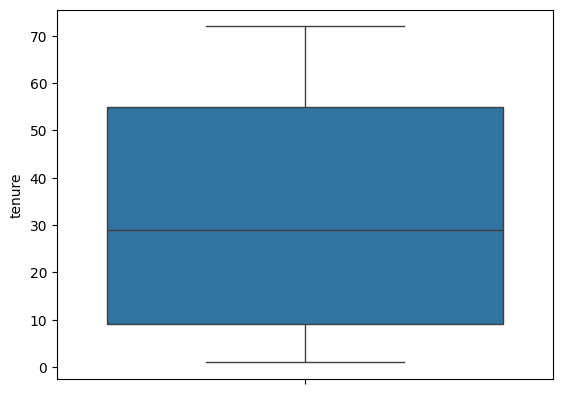

In [ ]:
sns.boxplot(data['tenure'])

<Axes: ylabel='MonthlyCharges'>

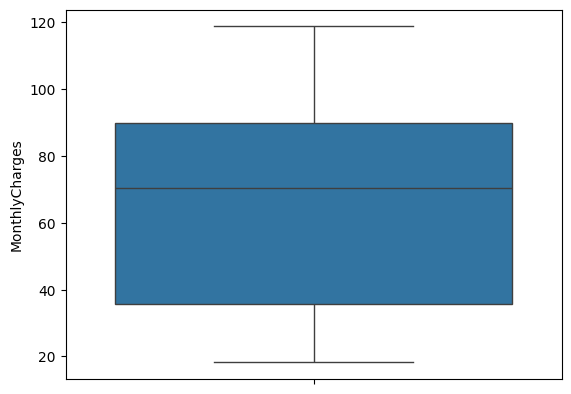

In [ ]:
sns.boxplot(data['MonthlyCharges'])

<Axes: ylabel='TotalCharges'>

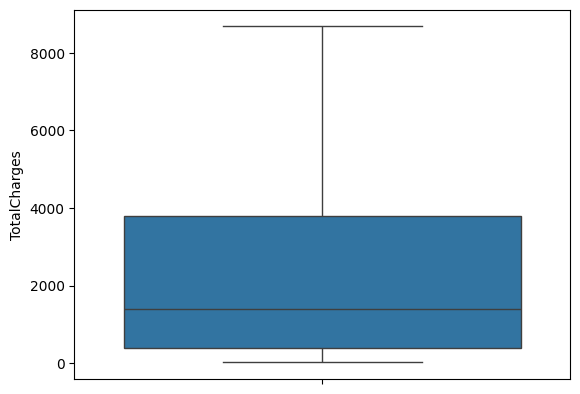

In [ ]:
sns.boxplot(data['TotalCharges'])

In [ ]:
def find_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [ ]:
find_outliers('tenure')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"


In [ ]:
find_outliers('MonthlyCharges')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"


In [ ]:
find_outliers('TotalCharges')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"


# Dropping Columns

In [ ]:
data.drop(columns=['PhoneService,PaperlessBilling',"customerID"],inplace=True)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# One-Hot Encoding

In [ ]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
columns_to_encode=['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for i in columns_to_encode:
    print(f"{i}:",data[i].value_counts().index)
    print()

Partner: Index(['No', 'Yes'], dtype='object', name='Partner')

Dependents: Index(['No', 'Yes'], dtype='object', name='Dependents')

PhoneService: Index(['Yes', 'No'], dtype='object', name='PhoneService')

MultipleLines: Index(['No', 'Yes', 'No phone service'], dtype='object', name='MultipleLines')

InternetService: Index(['Fiber optic', 'DSL', 'No'], dtype='object', name='InternetService')

OnlineSecurity: Index(['No', 'Yes', 'No internet service'], dtype='object', name='OnlineSecurity')

OnlineBackup: Index(['No', 'Yes', 'No internet service'], dtype='object', name='OnlineBackup')

DeviceProtection: Index(['No', 'Yes', 'No internet service'], dtype='object', name='DeviceProtection')

TechSupport: Index(['No', 'Yes', 'No internet service'], dtype='object', name='TechSupport')

StreamingTV: Index(['No', 'Yes', 'No internet service'], dtype='object', name='StreamingTV')

StreamingMovies: Index(['No', 'Yes', 'No internet service'], dtype='object', name='StreamingMovies')

Contract: Index(

In [ ]:
data = pd.get_dummies(data, columns=columns_to_encode,drop_first=True,dtype='int')

In [ ]:
data.head()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,Female,0,1,29.85,29.85,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,Male,0,34,56.95,1889.50,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,Male,0,2,53.85,108.15,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,Male,0,45,42.30,1840.75,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,Male,0,2,70.70,151.65,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


# Building Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_gender = LabelEncoder()
data["gender_encoder"] = label_encoder_gender.fit_transform(data["gender"])

data.drop(columns=["gender"], inplace=True)

In [ ]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,gender_encoder
0,0,1,29.85,29.85,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,34,56.95,1889.50,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,0,2,53.85,108.15,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,1
3,0,45,42.30,1840.75,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,2,70.70,151.65,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,1


In [ ]:
corr_matrix=data.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,gender_encoder
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.013199,-0.210550,0.008392,-0.008392,0.142996,0.254923,...,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541,-0.000745
tenure,0.015683,1.000000,0.246862,0.825880,0.377756,0.163386,0.007877,-0.007877,0.332399,0.017930,...,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049,0.007415
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.094235,-0.112343,0.248033,-0.248033,0.490912,0.787195,...,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858,-0.013177
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.314553,0.064653,0.113008,-0.113008,0.469042,0.360769,...,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484,0.002269
Partner_Yes,0.013199,0.377756,0.094235,0.314553,1.000000,0.446270,0.017604,-0.017604,0.139819,-0.001051,...,0.002348,0.117255,0.084843,0.246135,-0.011858,0.082940,-0.084573,-0.096053,-0.151819,-0.001358
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.446270,1.000000,-0.001078,0.001078,-0.024307,-0.164101,...,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128,0.012329
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,0.017604,-0.001078,1.000000,-1.000000,0.279530,0.290183,...,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691,-0.007396
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,-0.017604,0.001078,-1.000000,1.000000,-0.279530,-0.290183,...,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691,0.007396
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,0.139819,-0.024307,0.279530,-0.279530,1.000000,0.366420,...,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033,-0.007942
InternetService_Fiber optic,0.254923,0.017930,0.787195,0.360769,-0.001051,-0.164101,0.290183,-0.290183,0.366420,1.000000,...,-0.465736,0.322457,-0.076809,-0.209965,0.326470,-0.050552,0.335763,-0.305984,0.307463,-0.011384


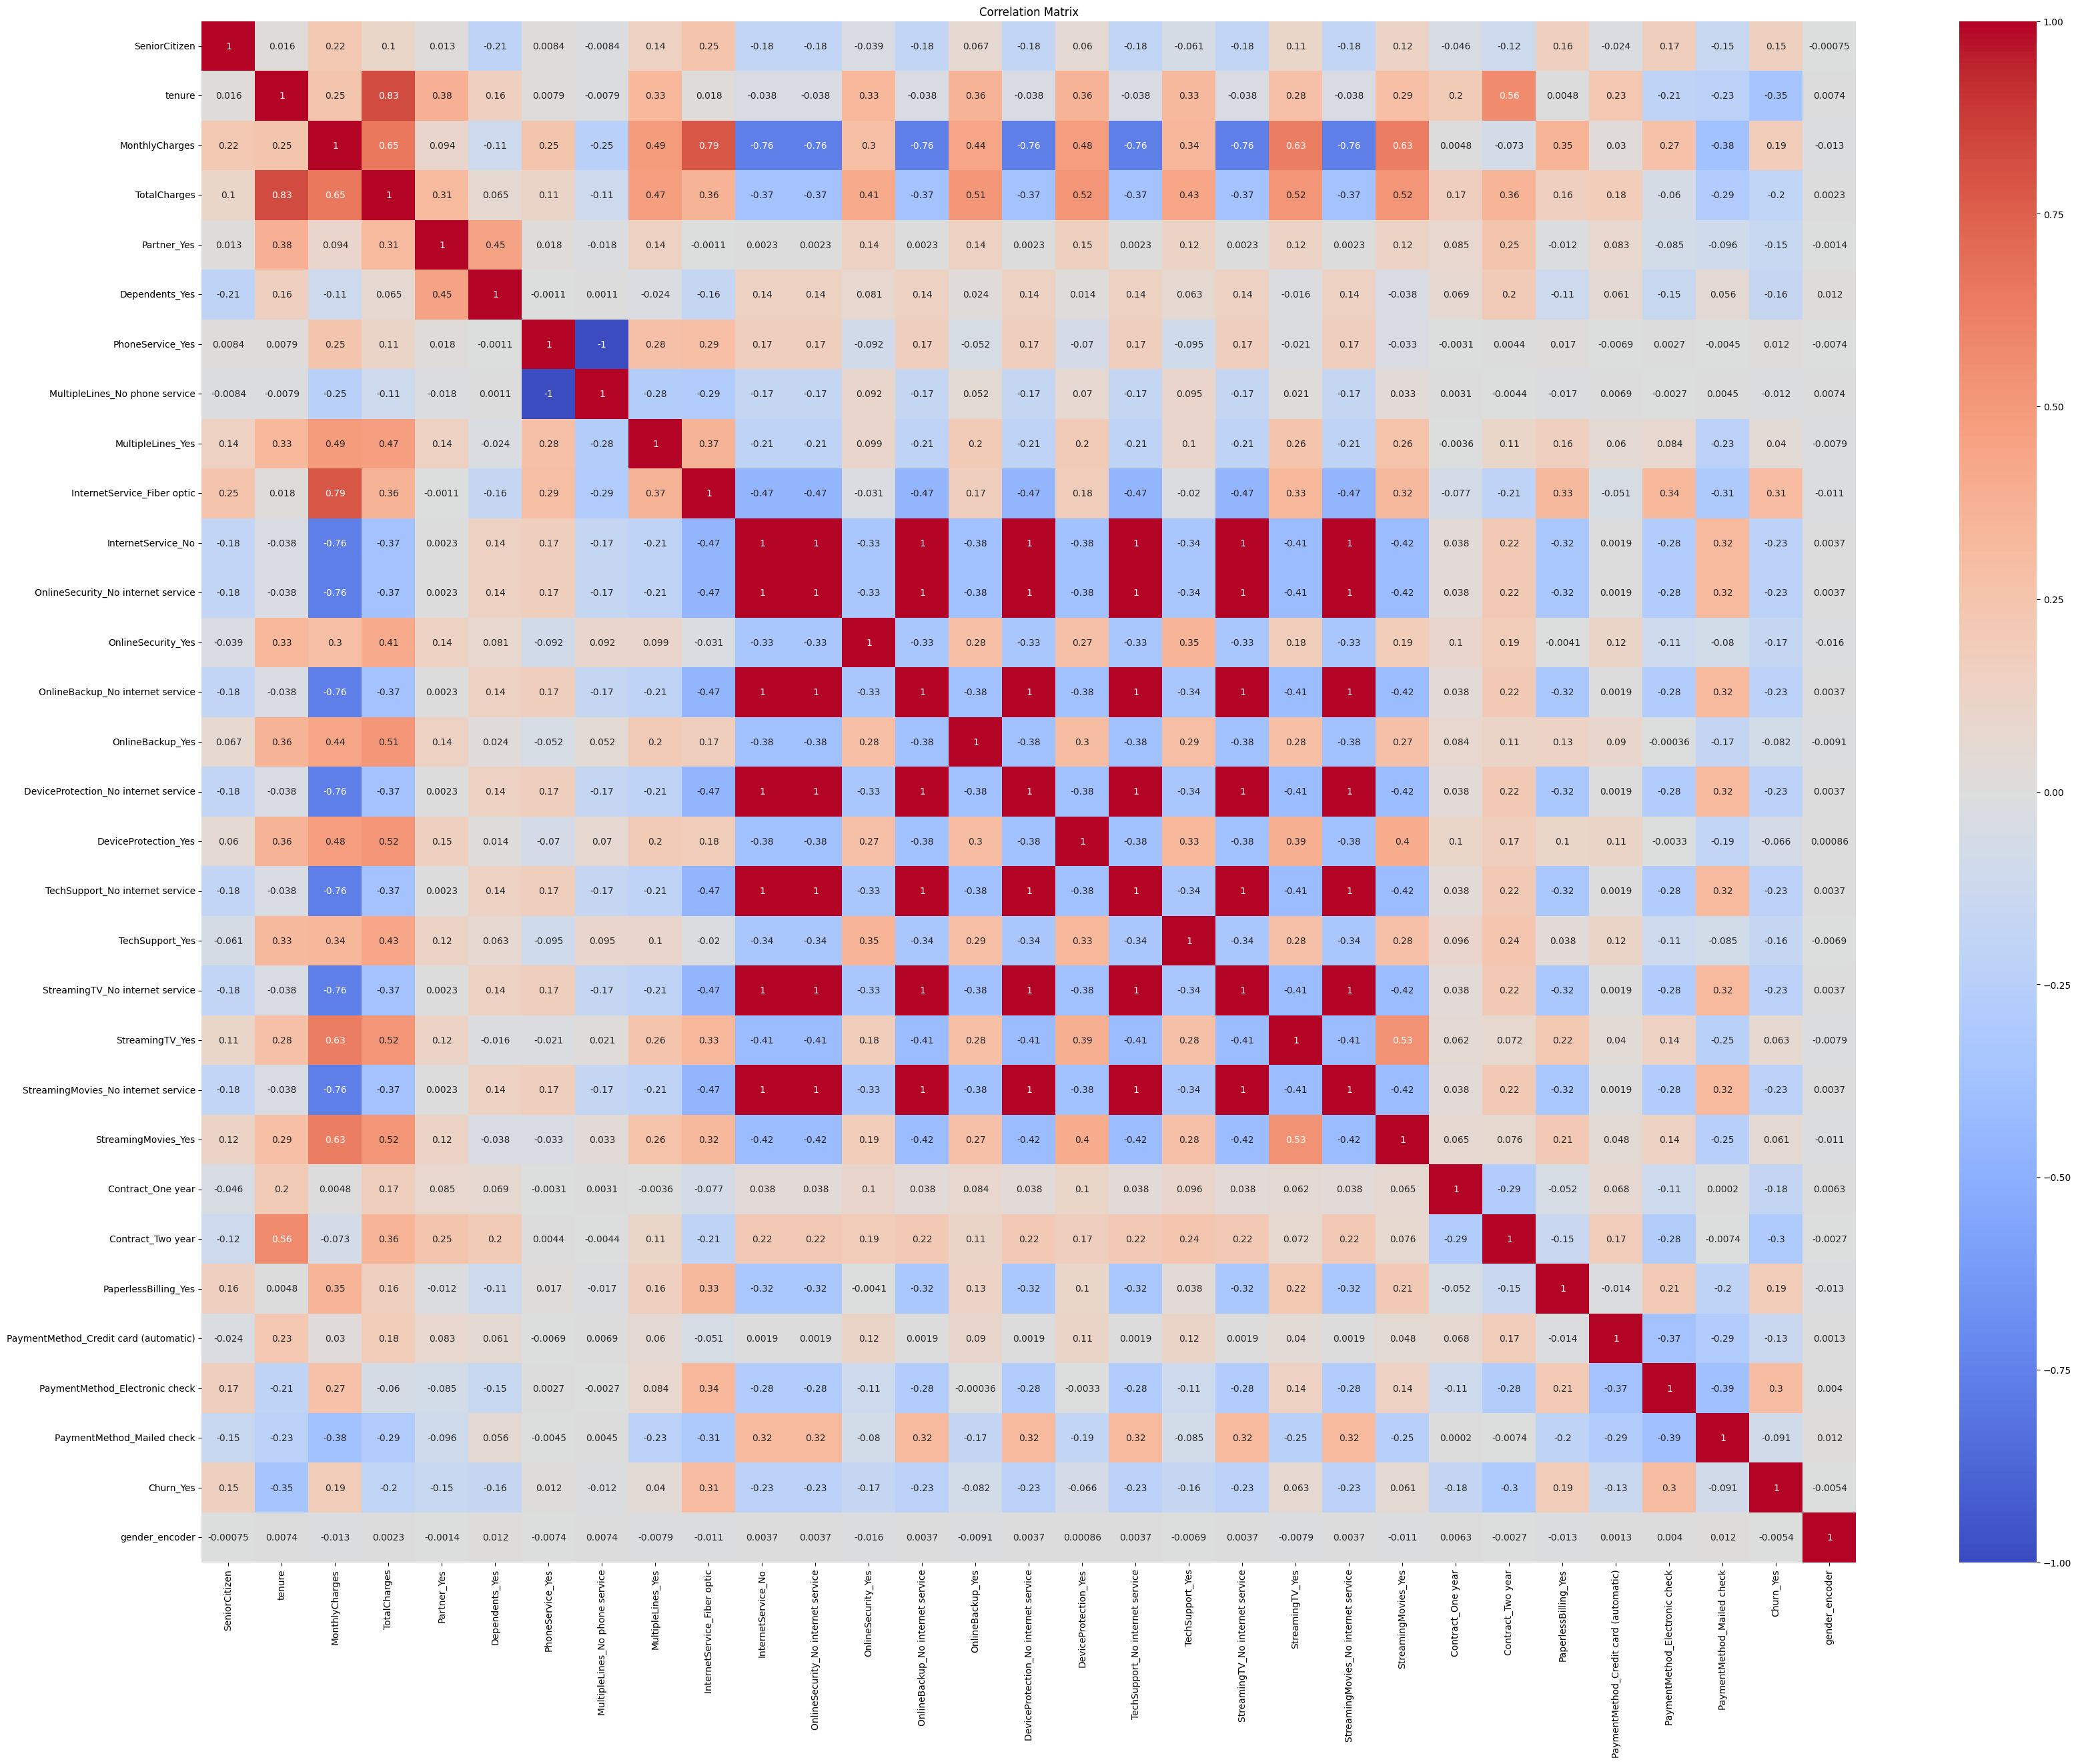

In [ ]:
plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(["Churn_Yes"],axis=1)
y=data["Churn_Yes"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_encoder
6030,0,43,49.05,2076.20,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
3410,0,3,53.40,188.70,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
5483,0,55,77.75,4458.15,1,0,1,0,1,1,...,0,0,0,0,0,1,0,1,0,0
5524,0,45,54.65,2553.70,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6337,0,55,100.90,5448.60,1,1,1,0,1,1,...,1,0,1,1,0,0,0,0,1,0


In [ ]:
X_train_with_target = X_train.copy()
X_train_with_target['Churn_Yes'] = y_train # Add the target to the training data for correlation computation

In [ ]:
df_cor = X_train_with_target.corr()['Churn_Yes']  # Calculate the correlation

df_cor = df_cor.drop('Churn_Yes')

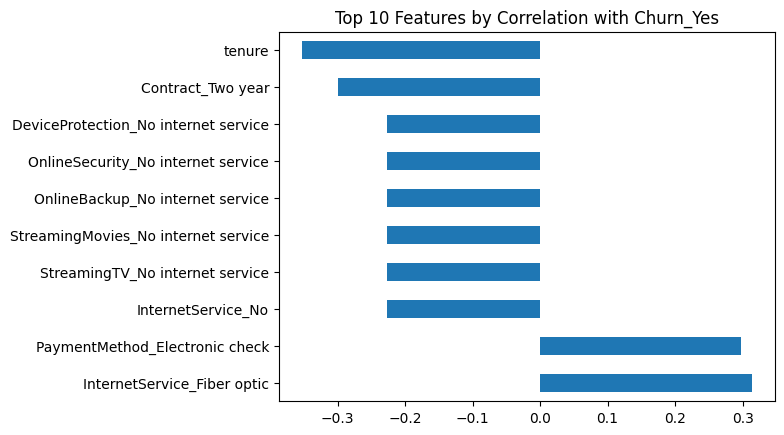

In [ ]:
#Select top 10 features based on absolute correlation
top_features = df_cor.abs().sort_values(ascending=False).head(10).index

df_cor[top_features].sort_values(ascending=False).plot(kind='barh')
plt.title('Top 10 Features by Correlation with Churn_Yes')
plt.show()

In [ ]:
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [ ]:
X_train_selected.head()

,tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,InternetService_No,StreamingTV_No internet service,StreamingMovies_No internet service,OnlineBackup_No internet service,OnlineSecurity_No internet service,DeviceProtection_No internet service
6030,43,0,0,0,0,0,0,0,0,0
3410,3,0,0,0,0,0,0,0,0,0
5483,55,1,0,1,0,0,0,0,0,0
5524,45,0,1,0,0,0,0,0,0,0
6337,55,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Reshape the 'tenure' feature to 2D array
X_train_tenure_reshaped = X_train_selected['tenure'].values.reshape(-1, 1)
X_test_tenure_reshaped = X_test_selected['tenure'].values.reshape(-1, 1)

X_train_selected['tenure'] = scaler.fit_transform(X_train_tenure_reshaped)
X_test_selected['tenure'] = scaler.transform(X_test_tenure_reshaped)

<ipython-input-47-f84d419c4fcd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected['tenure'] = scaler.fit_transform(X_train_tenure_reshaped)
<ipython-input-47-f84d419c4fcd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected['tenure'] = scaler.transform(X_test_tenure_reshaped)


In [ ]:
X_train_selected

,tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,InternetService_No,StreamingTV_No internet service,StreamingMovies_No internet service,OnlineBackup_No internet service,OnlineSecurity_No internet service,DeviceProtection_No internet service
6030,0.434674,0,0,0,0,0,0,0,0,0
3410,-1.195652,0,0,0,0,0,0,0,0,0
5483,0.923772,1,0,1,0,0,0,0,0,0
5524,0.516190,0,1,0,0,0,0,0,0,0
6337,0.923772,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3778,-1.195652,0,0,0,0,0,0,0,0,0
5199,0.760739,1,0,1,0,0,0,0,0,0
5235,-0.951104,1,0,1,0,0,0,0,0,0
5399,0.719981,0,0,0,1,1,1,1,1,1


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

In [ ]:
models={"Logistic Regression":LogisticRegression(),
        "Random Forest":RandomForestClassifier(),
        "Naive Bayes":BernoulliNB()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
  np.random.seed(42)
  model_scores={}
  for name,model in models.items():
    model.fit(X_train_selected,y_train)
    model_scores[name] = model.score(X_test_selected, y_test)
  return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train_selected,
                             X_test=X_test_selected,
                             y_train=y_train,
                             y_test=y_test)
model_scores


{'Logistic Regression': 0.7924662402274343,
 'Random Forest': 0.7690120824449183,
 'Naive Bayes': 0.6353944562899787}

In [ ]:
from sklearn.metrics import classification_report

# For Random Forest
y_pred_rf = models["Random Forest"].predict(X_test_selected)
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):\n", report_rf)

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

[[898 135]
 [190 184]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

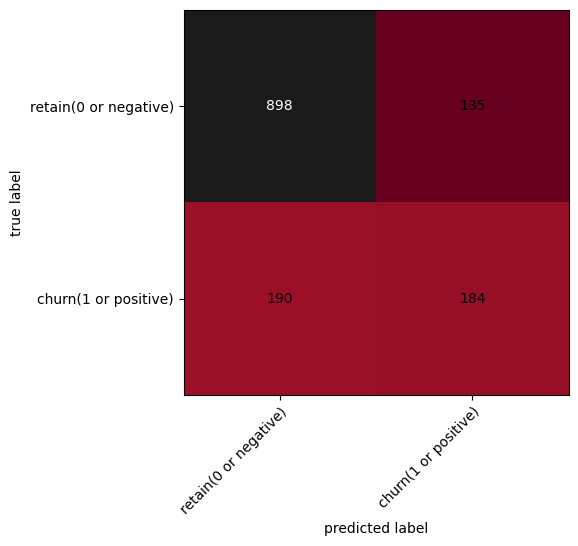

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred_rf)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["retain(0 or negative)","churn(1 or positive)"],figsize=(12,5),cmap= plt.cm.RdGy)

In [ ]:
#For Logistic Regression
y_pred_lr=models["Logistic Regression"].predict(X_test_selected)
report_lr=classification_report(y_test,y_pred_rf)
print("Classification Report (Logistic Regression):\n", report_lr)

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



[[942  91]
 [201 173]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

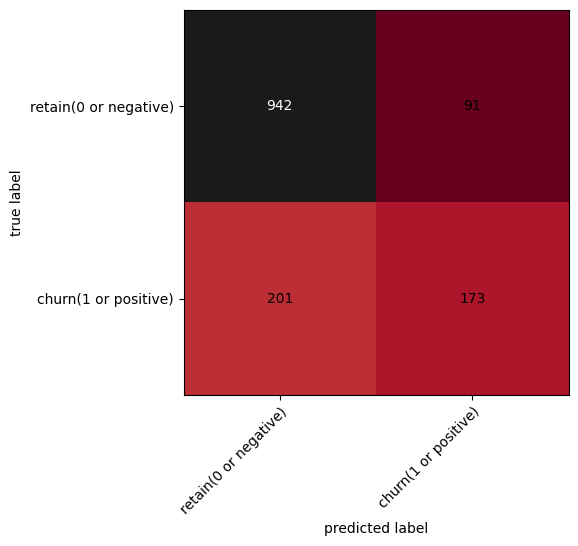

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred_lr)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["retain(0 or negative)","churn(1 or positive)"],figsize=(12,5),cmap= plt.cm.RdGy)

In [ ]:
# For Naive Bayes
y_pred_nb = models["Naive Bayes"].predict(X_test_selected)
report_rf = classification_report(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):\n", report_rf)

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.93      0.55      0.69      1033
           1       0.41      0.89      0.56       374

    accuracy                           0.64      1407
   macro avg       0.67      0.72      0.63      1407
weighted avg       0.79      0.64      0.65      1407



[[563 470]
 [ 43 331]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

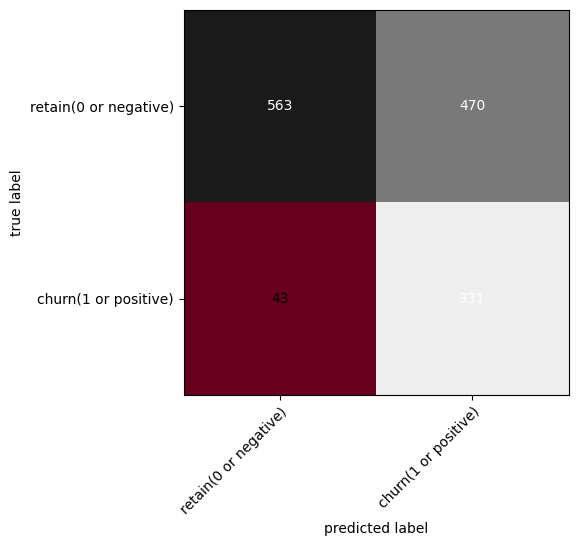

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred_nb)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["retain(0 or negative)","churn(1 or positive)"],figsize=(12,5),cmap= plt.cm.RdGy)

In [ ]:
model = {"KNN": KNeighborsClassifier()}  #default n-neighbor=5

knn_model_scores = fit_and_score(models=model,
                             X_train=X_train_selected,
                             X_test=X_test_selected,
                             y_train=y_train,
                             y_test=y_test)
knn_model_scores


{'KNN': 0.7540867093105899}

In [ ]:
train_scores = [] #to store the accuracy scores of the KNN model
test_scores = []

neighbors = range(1, 21) #in here we check n_neighbor for every number

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train_selected, y_train)
    train_scores.append(knn.score(X_train_selected, y_train))
    test_scores.append(knn.score(X_test_selected, y_test))





In [ ]:
max_test_score_knn= max(test_scores) #Finds the maximum accuracy score achieved on the test set (X_test and y_test).
best_k_values = [i + 1 for i, score in enumerate(test_scores) if score == max_test_score_knn] #Identifies the indices where the test accuracy equals max_test_score_knn.
print(f'Max test score: {max_test_score_knn * 100:.2f}% and k = {best_k_values}')

Max test score: 78.11% and k = [17, 19]


In [ ]:
model = {"KNN": KNeighborsClassifier(n_neighbors=17)}

knn_model_scores = fit_and_score(models=model,
                             X_train=X_train_selected,
                             X_test=X_test_selected,
                             y_train=y_train,
                             y_test=y_test)
knn_model_scores

{'KNN': 0.7810945273631841}

In [ ]:
y_pred_knn = model["KNN"].predict(X_test_selected)
report_lr=classification_report(y_test,y_pred_knn)
print("Classification Report (KNN):\n", report_lr)

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



[[919 114]
 [194 180]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

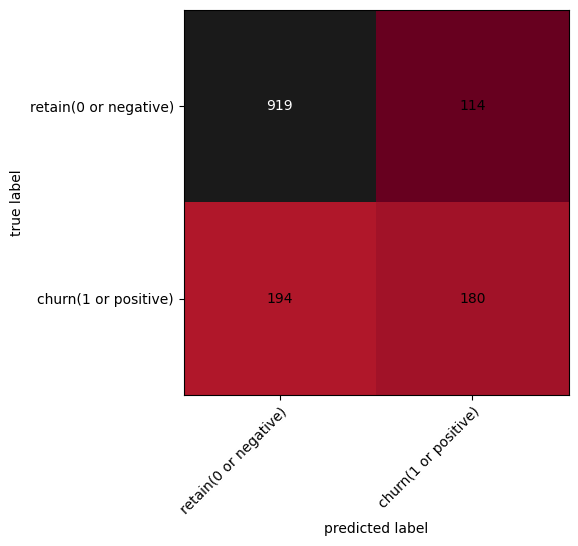

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred_knn)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["retain(0 or negative)","churn(1 or positive)"],figsize=(12,5),cmap= plt.cm.RdGy)

# Logistic Regression
#Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [ ]:
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best score for Logistic Regression: {grid_search_lr.best_score_}")

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.7951999999999999


In [ ]:
best_lr = grid_search_lr.best_estimator_
lr_score = best_lr.score(X_test_selected, y_test)
print(f"Test set accuracy for Logistic Regression: {lr_score}")

Test set accuracy for Logistic Regression: 0.7931769722814499


#Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
param_dist_lr = {
    'C': uniform(0.01, 100),
    'solver': ['liblinear', 'lbfgs']
}

random_search_lr = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist_lr, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search_lr.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd0092fb280>,
                                        'solver': ['liblinear', 'lbfgs']},
                   random_state=42, scoring='accuracy')

In [ ]:
print(f"Best parameters for Logistic Regression: {random_search_lr.best_params_}")
print(f"Best score for Logistic Regression: {random_search_lr.best_score_}")

Best parameters for Logistic Regression: {'C': 0.08787658410143283, 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.7951999999999999


In [ ]:
best_lr = random_search_lr.best_estimator_
lr_score = best_lr.score(X_test_selected, y_test)
print(f"Test set accuracy for Logistic Regression: {lr_score}")

Test set accuracy for Logistic Regression: 0.7917555081734187


# Random Forest
#Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 0.7902222222222222


In [ ]:
best_rf = grid_search_rf.best_estimator_
rf_score = best_rf.score(X_test_selected, y_test)
print(f"Test set accuracy for Random Forest: {rf_score}")

Test set accuracy for Random Forest: 0.7768301350390903


# Random Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(10, 31)),
    'min_samples_split': randint(2, 11)
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist_rf, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25, 26,
                                                      27, 28, 29, 30],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bd009363c10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bd009287250>},
                   random_state=42, scoring='accuracy')

In [ ]:
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")
print(f"Best score for Random Forest: {random_search_rf.best_score_}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 183}
Best score for Random Forest: 0.7904


In [ ]:
best_rf = random_search_rf.best_estimator_
rf_score = best_rf.score(X_test_selected ,y_test)
print(f"Test set accuracy for Random Forest: {rf_score}")

Test set accuracy for Random Forest: 0.775408670931059


# Naive Bayes
#Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

param_grid_nb = {
    'alpha': [0.01, 0.1, 1, 10]
}

grid_search_nb = GridSearchCV(BernoulliNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10]}, scoring='accuracy')

In [ ]:
print(f"Best parameters for Naive Bayes: {grid_search_nb.best_params_}")
print(f"Best score for Naive Bayes: {grid_search_nb.best_score_}")

Best parameters for Naive Bayes: {'alpha': 10}
Best score for Naive Bayes: 0.6462222222222223


In [ ]:
best_nb = grid_search_nb.best_estimator_
nb_score = best_nb.score(X_test_selected, y_test)
print(f"Test set accuracy for Naive Bayes: {nb_score}")

Test set accuracy for Naive Bayes: 0.6353944562899787


# Random Search

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from scipy.stats import uniform

param_dist_nb = {
    'alpha': uniform(0.001, 10)
}

random_search_nb = RandomizedSearchCV(BernoulliNB(), param_distributions=param_dist_nb, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search_nb.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=BernoulliNB(), n_iter=50,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bd009284940>},
                   random_state=42, scoring='accuracy')

In [ ]:
print(f"Best parameters for Naive Bayes: {random_search_nb.best_params_}")
print(f"Best score for Naive Bayes: {random_search_nb.best_score_}")

Best parameters for Naive Bayes: {'alpha': 3.746401188473625}
Best score for Naive Bayes: 0.6462222222222223


In [ ]:
best_nb = random_search_nb.best_estimator_
nb_score = best_nb.score(X_test_selected, y_test)
print(f"Test set accuracy for Naive Bayes: {nb_score}")

Test set accuracy for Naive Bayes: 0.6353944562899787


# KNN
#Grid Search

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best score for KNN: {grid_search_knn.best_score_}")

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best score for KNN: 0.7793777777777778


In [ ]:
best_knn = grid_search_knn.best_estimator_
knn_score = best_knn.score(X_test_selected, y_test)
print(f"Test set accuracy for KNN: {knn_score}")

Test set accuracy for KNN: 0.7661691542288557


# Random Search

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_dist_knn = {
    'n_neighbors': randint(3, 12),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist_knn, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search_knn.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bd008ebcd30>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [ ]:
print(f"Best parameters for KNN: {random_search_knn.best_params_}")
print(f"Best score for KNN: {random_search_knn.best_score_}")

Best parameters for KNN: {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
Best score for KNN: 0.7797333333333334


In [ ]:
best_knn = random_search_knn.best_estimator_
knn_score = best_knn.score(X_test_selected, y_test)
print(f"Test set accuracy for KNN: {knn_score}")

Test set accuracy for KNN: 0.775408670931059
